# Doctor's Consultation Fees Prediction

Problem Statement:

Predict A Doctor's Consultation Fee 

We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high. As a data scientist we all should do better. What if you have data that records important details about a doctor and you get to build a model to predict the doctor’s consulting fee.? This is the use case that let's you do that. 
<br><br>
<b>Size of training set: 5961 records</b>
<br><br>
<b>Size of test set: 1987 records</b>

<b>FEATURES:</b><br>

Qualification: Qualification and degrees held by the doctor<br>

Experience: Experience of the doctor in number of years<br>

Rating: Rating given by patients<br>

Profile: Type of the doctor<br>

Miscellaneous_Info: Extra information about the doctor<br>

Fees: Fees charged by the doctor (Target Variable)<br>

Place: Area and the city where the doctor is located.

# Reading and Understanding the Data

# IMPORTING ALL THE LIABRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import warnings                                                                 
warnings.filterwarnings('ignore') 
%matplotlib inline
from subprocess import check_output
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

Importing Dataset

Since Data is in excel format so we will use pd.read_excel func to read data.<BR>
After loading the data, it is important to have basic understanding about the data like shape, info and basic understanding of presence of null values in data.

In [2]:
dftest=pd.read_excel('Final_Test.xlsx')
dftrain=pd.read_excel('Final_Train.xlsx')

In [3]:
dftest.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [4]:
dftrain.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [5]:
# let check shape

dftrain.shape


(5961, 7)

In [6]:
dftest.shape

(1987, 6)

In [7]:
# check train column types
ctype = dftrain.dtypes.reset_index()
ctype.columns = ["Count", "Column Type"]
ctype.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,1
1,object,6


In [8]:
# check test column types

ctype = dftest.dtypes.reset_index()
ctype.columns = ["Count", "Column Type"]
ctype.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,object,6


In [9]:
# check for null values
round(dftrain.isnull().sum()/len(dftrain) * 100,2)

Qualification          0.00
Experience             0.00
Rating                55.39
Place                  0.42
Profile                0.00
Miscellaneous_Info    43.95
Fees                   0.00
dtype: float64

# EDA

There will be lot's of analysis which can be assumed by observing our data as all the feature we are having is categorical even experience

Extract Experience Year from Experience column and convert to Numeric.

In [10]:
# Experience
dftrain['Experience'] = dftrain['Experience'].str.split().str[0]
dftrain['Experience'] = dftrain['Experience'].astype(int)

In [11]:
dftrain.head(2)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350


Moving with Place Column<br>
As, there are some missing values in Place column so I have replaced then with Unknown, Unknown to represent them.<br>
then, we can easily extract city and locality from Place variable.

In [12]:
dftrain.Place.fillna('Unknown,Unknown',inplace=True)

dftrain['locality'] = dftrain['Place'].str.split(",").str[0]
dftrain['city'] = dftrain['Place'].str.split(",").str[1]

#Now we can drop the place variable
dftrain.drop('Place',axis=1,inplace=True)

Rating Column

Rating has more then 55% of missing values so first we have to deal with them, then convert Rating to int.

In [13]:
# Fill missing values with -99% to provide them different importance.
dftrain['Rating'].fillna('-99%',inplace=True)

# extract value of rating to avoid '%' and convert to numeric
dftrain['Rating'] = dftrain['Rating'].str.slice(stop=-1).astype(int)

Now, I grouped the rating in 10 groups(bins of size 10). Missing values will fall under 0 group. while, 0-9% will be class 1, 10–19% will be class 2, so on and so forth

Use cut when you need to segment and sort data values into bins. For example, cut could convert ages to groups of age ranges. Supports binning into an equal number of bins, or a pre-specified array of bins.

In [14]:
print("0-9% ",len(dftrain[(dftrain['Rating']>0) & (dftrain['Rating']<10)]))
print("10-19% ",len(dftrain[(dftrain['Rating']>=10) & (dftrain['Rating']<20)]))
print("20-29% ",len(dftrain[(dftrain['Rating']>=20) & (dftrain['Rating']<30)]))
print("30-39% ",len(dftrain[(dftrain['Rating']>=30) & (dftrain['Rating']<40)]))
print("And so-on..")

0-9%  1
10-19%  0
20-29%  0
30-39%  3
And so-on..


In [15]:
bins = [-99,0,10,20,30,40,50,60,70,80,90,100]
labels = [i for i in range(11)]
dftrain['Rating'] = pd.cut(dftrain['Rating'], bins=bins, labels=labels, include_lowest=True)

In [16]:
dftrain['Rating'].value_counts().sort_index()


0     3302
1        1
2        0
3        0
4        4
5        3
6       19
7       32
8       98
9      280
10    2222
Name: Rating, dtype: int64

nice it is exactly being grouped.

Working with Qualification

In [17]:
dftrain['Qualification_count'] = dftrain['Qualification'].apply(lambda x: len(x.split(",")))

dftrain['Qualification_count'].value_counts()

2     2628
1     1962
3      995
4      257
5       84
6       23
7        6
9        3
8        2
10       1
Name: Qualification_count, dtype: int64

In [18]:
dftrain['Qualification'].unique()

array(['BHMS, MD - Homeopathy', 'BAMS, MD - Ayurveda Medicine',
       'MBBS, MS - Otorhinolaryngology', ...,
       'MD - Dermatology , Venereology & Leprosy, MBBS, Fellowship In Dermatosurgery',
       'BDS, certification in smile designing',
       'MD - Homeopathy, Post Graduate Diploma in Healthcare Management(PGDHM), DHMS (Diploma in Homeopathic Medicine and Surgery)'],
      dtype=object)

here there are lot of Qualification but most of doctors only has 1 or 2 qualification.<br>
And the data is to much messy like, 'MBA -Healthcare' and ‘MBA’ which referred to same category so here we will take the top 10 Qualification that occurs the most.

Extract relevant qualification

In [19]:
dftrain["Qualification"]=dftrain["Qualification"].str.split(",")
Qualification ={}
for x in dftrain["Qualification"].values:
    for each in x:
        each = each.strip()
        if each in Qualification:
            Qualification[each]+=1
        else:
            Qualification[each]=1
            
print(Qualification)

{'BHMS': 749, 'MD - Homeopathy': 181, 'BAMS': 764, 'MD - Ayurveda Medicine': 139, 'MBBS': 2808, 'MS - Otorhinolaryngology': 103, 'BSc - Zoology': 3, 'BDS': 1363, 'MD - General Medicine': 285, 'BSc': 3, 'MS': 2, 'DNB - ENT': 111, 'MDS': 82, 'MDS - Oral & Maxillofacial Surgery': 104, 'Diploma in Otorhinolaryngology (DLO)': 250, 'MF- Homeopathy': 5, 'MS - ENT': 411, 'DNB': 58, 'Fellowship of College of General Practice (FCGP)': 13, 'DDVL': 161, 'IBCLC (USA)': 1, 'Post Graduate Diploma in Diabetology (PGDD)': 53, 'Diploma in Dermatology': 67, 'Fellowship in Aesthetic Medicine': 23, 'DM - Neurology': 6, 'MD - Pediatrics': 13, 'Fellowship in Cleft Lip and Craniofacial Surgery': 1, 'Diploma in Cosmetology': 3, 'AFIH': 4, 'MDS - Prosthodontist And Crown Bridge': 45, 'M. D. Hom. (Practice of Medicine)': 2, 'Diploma in Emergency Medicine': 8, 'Diploma in Counselling Skills': 2, 'DHMS (Diploma in Homeopathic Medicine and Surgery)': 47, 'MD - Dermatology': 606, 'Venereology & Leprosy': 297, 'MDS -

In [20]:
#Extract top 10 qualification
most_qual = sorted(Qualification.items(),key=lambda x:x[1],reverse=True)[:10]
final_qual = []
for qual in most_qual:
    final_qual.append(qual[0])
    
print(final_qual)

['MBBS', 'BDS', 'BAMS', 'BHMS', 'MD - Dermatology', 'MS - ENT', 'Venereology & Leprosy', 'MD - General Medicine', 'Diploma in Otorhinolaryngology (DLO)', 'MD - Homeopathy']


In [21]:
#Encode extracted top 10 qualification into train dataset as new column.
for qual in final_qual:
    dftrain[qual] = 0

for x,y in zip(dftrain['Qualification'].values, np.array([i for i in range(len(dftrain))])):
    for c in x:
        c = c.strip()
        if c in final_qual:
            dftrain[c][y] = 1

In [22]:
dftrain['Qualification'].values

array([list(['BHMS', ' MD - Homeopathy']),
       list(['BAMS', ' MD - Ayurveda Medicine']),
       list(['MBBS', ' MS - Otorhinolaryngology']), ..., list(['MBBS']),
       list(['MBBS', ' MD - General Medicine']),
       list(['BDS', ' MDS - Orthodontics'])], dtype=object)

In [23]:
# Now we can drop the extra quali which we added 
dftrain.drop(['Qualification','Qualification_count'],axis=1,inplace=True)

In [24]:
dftrain.head(4)

,Experience,Rating,Profile,Miscellaneous_Info,Fees,locality,city,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,10,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam,0,0,0,1,0,0,0,0,0,1
1,12,10,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore,0,0,1,0,0,0,0,0,0,0
2,9,0,ENT Specialist,NaN,300,Mathikere - BEL,Bangalore,1,0,0,0,0,0,0,0,0,0
3,12,0,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore,0,0,1,0,0,0,0,0,0,0


<b>Interpretation</b><br>
Now, we can see that we are having top 10 Qual columns in our training set which are perfectly one-hot encoded. where there is 2 Qual from top 10 in that row two 1 are there, and it's correct.

In [25]:
# CITY COLUMN
dftrain['city'].unique()

array([' Ernakulam', ' Bangalore', ' Chennai', ' Delhi', ' Hyderabad',
       ' Coimbatore', ' Mumbai', ' Thiruvananthapuram', 'Unknown',
       ' Sector 5', nan], dtype=object)

In [26]:
# remove the extra spaces before the city
import re
dftrain['city'] = dftrain['city'].apply(lambda x: re.sub(' +','',str(x)))

In [27]:
dftrain['city'].value_counts()

Bangalore             1258
Mumbai                1219
Delhi                 1184
Hyderabad              951
Chennai                855
Coimbatore             228
Ernakulam              153
Thiruvananthapuram      86
Unknown                 25
nan                      1
Sector5                  1
Name: city, dtype: int64

In [28]:
# city contains some improper data.
dftrain[(dftrain['city'] == "nan") | (dftrain['city'] == "Sector5")]

,Experience,Rating,Profile,Miscellaneous_Info,Fees,locality,city,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
2169,11,0,Dentist,NaN,250,Dwarka,Sector5,0,1,0,0,0,0,0,0,0,0
3980,23,0,Dentist,NaN,250,e,nan,0,1,0,0,0,0,0,0,0,0


In [29]:
dftrain[dftrain['locality'] == 'Dwarka']  

,Experience,Rating,Profile,Miscellaneous_Info,Fees,locality,city,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
166,7,0,Dentist,Wisdom Tooth Extraction Oral & Maxillofacial S...,300,Dwarka,Delhi,0,1,0,0,0,0,0,0,0,0
299,8,0,Homeopath,NaN,250,Dwarka,Delhi,0,0,0,1,0,0,0,0,0,0
306,31,0,General Medicine,NaN,300,Dwarka,Delhi,1,0,0,0,0,0,0,0,0,0
485,30,0,Ayurveda,NaN,200,Dwarka,Delhi,0,0,1,0,0,0,0,0,0,0
690,19,10,General Medicine,"98% 72 Feedback Dwarka, Delhi",700,Dwarka,Delhi,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5612,30,7,ENT Specialist,"67% 5 Feedback Dwarka, Delhi",400,Dwarka,Delhi,1,0,0,0,0,1,0,0,0,0
5685,19,10,Dermatologists,"98% 10 Feedback Dwarka, Delhi",400,Dwarka,Delhi,1,0,0,0,0,0,0,0,0,0
5724,11,0,Dentist,Complete/Partial Dentures Fixing Impaction / I...,300,Dwarka,Delhi,0,1,0,0,0,0,0,0,0,0
5886,11,10,Dermatologists,"100% 43 Feedback Dwarka, Delhi",600,Dwarka,Delhi,1,0,0,0,1,0,1,0,0,0


*whereever the locality is Dwarka the city is Delhi, and this Sector5 is area of that so it's misclassified here. which we have to correct.<br>
*And where city nan there we have to impute this to unknown in locality and city both.

In [30]:
dftrain['city'] = np.where(dftrain['city']=="Sector5","Delhi", dftrain['city'])

#nan
dftrain['city'].loc[3980] = "Unknown"
dftrain['locality'].loc[3980] = "Unknown"

In [31]:
dftrain.head()

,Experience,Rating,Profile,Miscellaneous_Info,Fees,locality,city,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,10,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam,0,0,0,1,0,0,0,0,0,1
1,12,10,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore,0,0,1,0,0,0,0,0,0,0
2,9,0,ENT Specialist,NaN,300,Mathikere - BEL,Bangalore,1,0,0,0,0,0,0,0,0,0
3,12,0,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore,0,0,1,0,0,0,0,0,0,0
4,20,10,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai,0,0,1,0,0,0,0,0,0,0


In [32]:
# let's see for each city how much locality data is there
dftrain.groupby('city')['locality'].nunique()

city
Bangalore             153
Chennai               124
Coimbatore             48
Delhi                 200
Ernakulam              52
Hyderabad             135
Mumbai                115
Thiruvananthapuram     48
Unknown                 1
Name: locality, dtype: int64

In [33]:
dftrain.to_csv('data_correct.csv',index=False)

In [34]:
dftrain.head(3)

,Experience,Rating,Profile,Miscellaneous_Info,Fees,locality,city,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,10,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam,0,0,0,1,0,0,0,0,0,1
1,12,10,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore,0,0,1,0,0,0,0,0,0,0
2,9,0,ENT Specialist,NaN,300,Mathikere - BEL,Bangalore,1,0,0,0,0,0,0,0,0,0


<b>Categorical Encoding</b><br>
Before encoding a categorical variable, look at relationship of data with respect to target column To have better understand the data

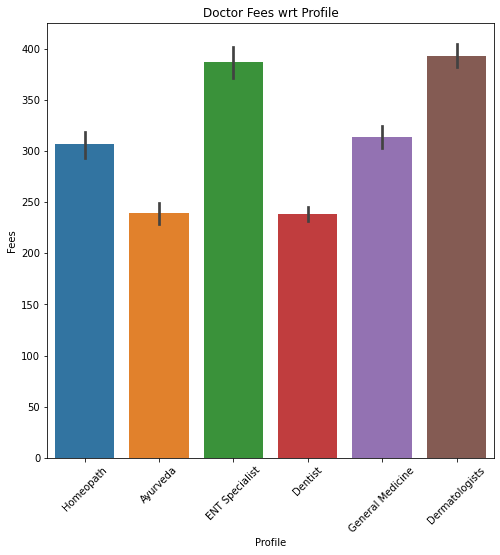

In [35]:
plt.figure(figsize=(8,8))
sns.barplot(x='Profile',y='Fees',data=dftrain)
plt.title("Doctor Fees wrt Profile")
plt.xticks(rotation=45)
plt.show()

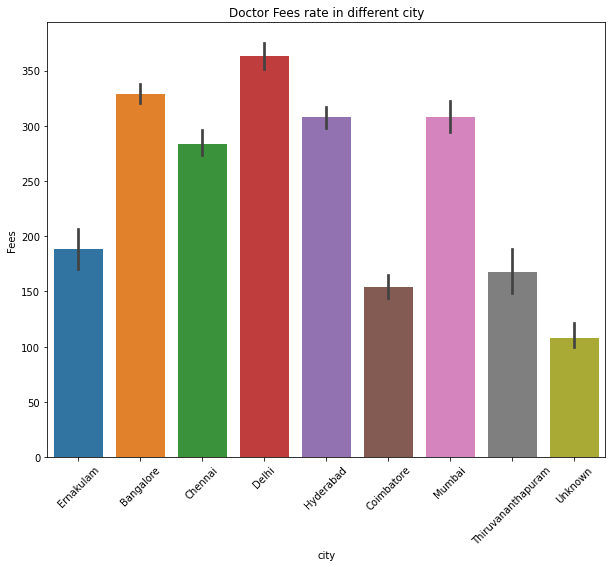

In [36]:
plt.figure(figsize=(10,8))
sns.barplot(x='city',y='Fees',data=dftrain)
plt.title("Doctor Fees rate in different city")
plt.xticks(rotation=45)
plt.show()

<b>Observations</b><br>
*As Delhi, Banglore, Hyderabad, Mumbai and Chennai are in list of Tier 1 city so, as usual the doctor consultation fees in these metripolean cities are very high as compared to Tier 2 and Tier 3 city.<br>
*Doctor Fess with having profile as ENT Specialist and Dermatologist is very high then Homeopath and Genral medicine are at same level.

In [37]:
dftrain = pd.get_dummies(dftrain,columns=['city','Profile'], prefix=['city','Profile'])


In [38]:
dftrain.head()

,Experience,Rating,Miscellaneous_Info,Fees,locality,MBBS,BDS,BAMS,BHMS,MD - Dermatology,...,city_Hyderabad,city_Mumbai,city_Thiruvananthapuram,city_Unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,24,10,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,12,10,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,9,0,NaN,300,Mathikere - BEL,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,12,0,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,20,10,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


<b>Miscellaneous_Info & locality</b>

*Miscellaneous_Info is to much messy column and it consist the data which we already have like doctor address(city & locality) and Rating<br>
*locality and city are approximate have same relationship so better to move with only city<br>
*so drop the Miscellaneous_Info and locality

In [39]:
dftrain.drop(['Miscellaneous_Info','locality'],axis=1,inplace=True)

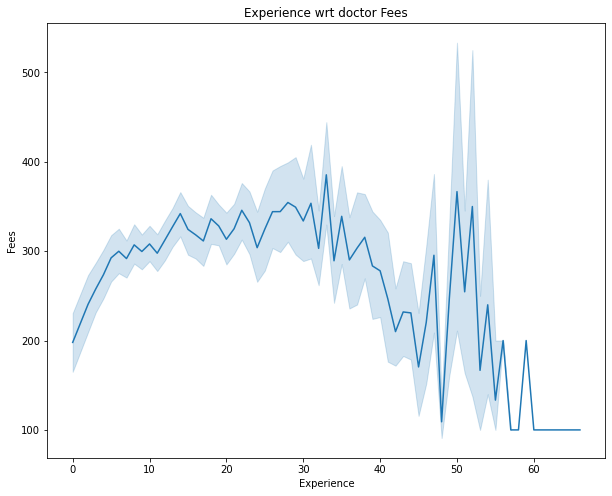

In [40]:
plt.figure(figsize=(10,8))
ax = sns.lineplot(x='Experience',y='Fees',data=dftrain)
ax.set_title("Experience wrt doctor Fees")
plt.show()

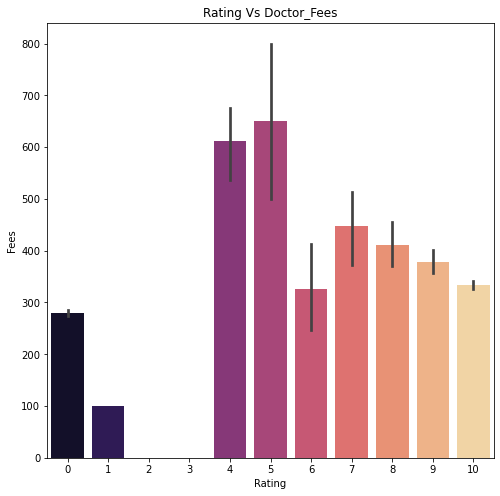

In [41]:
plt.figure(figsize=(8,8))
sns.barplot(x='Rating',y='Fees',data=dftrain,palette='magma')
plt.title("Rating Vs Doctor_Fees")
plt.show()

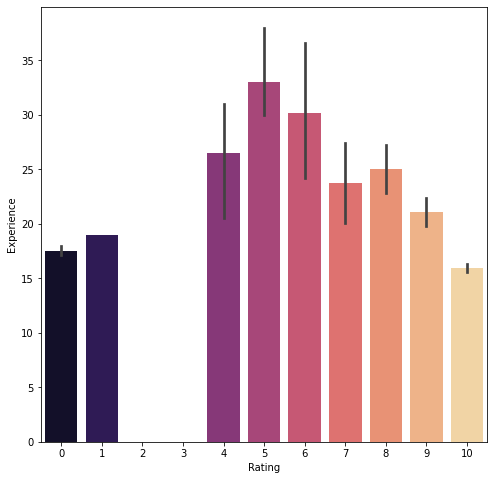

In [42]:
plt.figure(figsize=(8,8))
sns.barplot(x='Rating',y='Experience',data=dftrain,palette='magma')
plt.show()

<b>OBSERVATIONS</b><br>
*the Rating is interesting column, we have grouped the rating in 10 bins, eg: bin5 will be rating of 40-49%.<br><br>
*As, we can see that High rating does not relate to high fees charged(infact low fees can be reason of high rating) and where fees are charged so high, there rating is between 30-60%.<br><br>
*The median of experience in bin 4 & 5 is 27 and 31 years respectively. whereas in highest rating of 10th bin the median experience is 14 years.

In [43]:
dftrain.head()

,Experience,Rating,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,...,city_Hyderabad,city_Mumbai,city_Thiruvananthapuram,city_Unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,24,10,100,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,12,10,350,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,9,0,300,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,12,0,250,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,20,10,250,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


# TEST DATASET

EXPERIENCE COLUMN

In [45]:
dftest['Experience'] = dftest['Experience'].str.split().str[0]
dftest['Experience'] = dftest['Experience'].astype(int)


Place column (Extract city and locality in diff column)

In [46]:
dftest['Place'].fillna('Unknown,Unknown',inplace=True)
dftest['locality'] = dftest['Place'].str.split(",").str[0]
dftest['city'] = dftest['Place'].str.split(",").str[1]

In [47]:
dftest.drop('Place',axis=1,inplace=True)

Rating column

In [48]:
dftest['Rating'].fillna('-99%',inplace=True)
dftest['Rating'] = dftest['Rating'].str.slice(stop=-1).astype(int)

group rating in 10 groups, missing_value to group 0

In [49]:
bins = [-99,0,10,20,30,40,50,60,70,80,90,100]
labels = [int(i) for i in range(11)]
dftest['Rating'] = pd.cut(dftest['Rating'], bins=bins, labels=labels, include_lowest=True)

HERE the top 10 Qualification of train and test col should be same so I am imputing the train col to test col

In [51]:
dfdata=pd.read_excel('Final_Train.xlsx')
dfdata['Qualification'] = dfdata['Qualification'].str.split(",")
Qualification = {}
for x in dfdata['Qualification']:
    for each in x:
        each = each.strip()
        if each in Qualification:
            Qualification[each] += 1
        else:
            Qualification[each] = 1

finding out the top 10 Qualification

In [52]:
most_qual = sorted(Qualification.items(), key=lambda x:x[1], reverse=True)[:10]
final_qual = []
for qual in most_qual:
    final_qual.append(qual[0])

encode the top 10 qualification in test dataset

In [53]:
for title in final_qual:
    dftest[title] = 0

for x,y in zip(dftest['Qualification'].values, np.array([i for i in range(len(dftest))])):
    for c in x:
        c = c.strip()
        if c in final_qual:
            dftest[c][y] = 1

drop Qualification after getting top 10 qual.

In [54]:
dftest.drop('Qualification',axis=1,inplace=True)

city column

In [55]:
dftest['city'] = dftest['city'].apply(lambda x: re.sub(' +','',x))

encode city and profile

In [56]:
dftest = pd.get_dummies(dftest, columns=['city','Profile'], prefix=['city','Profile'])

drop Miscellaneous_Info and locality

In [57]:
dftest.drop(['Miscellaneous_Info','locality'], axis=1, inplace=True)

Feature Scalling

In [58]:
x = dftrain.drop('Fees',axis=1)
y = dftrain['Fees']

In [59]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X = stdsc.fit_transform(x)

train-test split

In [60]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# Model Building

In [62]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer

In [63]:
def score(y_pred,y):
    y_pred = np.log(y_pred)
    y = np.log(y)
    return 1 - ((np.sum((y_pred-y)**2))/len(y))**1/2

In [64]:
scorer = make_scorer(score,greater_is_better=True, needs_proba=False)

In [65]:
knn_reg = KNeighborsRegressor()
svm_reg = SVR(gamma='scale')
dt_reg = DecisionTreeRegressor()
rf_reg = RandomForestRegressor()

In [66]:
for reg in (knn_reg, svm_reg, dt_reg, rf_reg):
    reg.fit(x_train, y_train)
    
    y_pred = reg.predict(x_test)
    
    print(reg, score(y_pred,y_test))

KNeighborsRegressor() 0.7759692513240842
SVR() 0.7942077126478044
DecisionTreeRegressor() 0.6692855878821724
RandomForestRegressor() 0.764112130361114


HyperParameter Tuning

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [71]:
grid = dict(C=[0.1,1,10], kernel=['linear','poly','rbf'], gamma=['scale','auto'])
svm_random = RandomizedSearchCV(svm_reg, param_distributions= grid, scoring=scorer, cv=5, random_state=42, n_iter=100, verbose=1, n_jobs=-1)

In [72]:
svm_random.fit(x_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   57.9s finished


RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf']},
                   random_state=42, scoring=make_scorer(score), verbose=1)

In [73]:
print("best_score:",svm_random.best_score_)
print("best_params:\n",svm_random.best_params_)

best_score: 0.8056521524720275
best_params:
 {'kernel': 'rbf', 'gamma': 'auto', 'C': 10}


predict the test data from it and see the result

In [74]:
predictions = svm_random.predict(x_test)

print("1-RMSLE:",score(predictions, y_test))

1-RMSLE: 0.804639194678942


Trying Hyperparameter tuning for RandomForest Regressor

In [75]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()

try hyperparameter tuning

In [76]:
#no. of tress random_forest
n_estimators = [int(x) for x in np.linspace(start=150,stop=1000,num=6)]

In [77]:
#max levels in tree
max_depth = [int(x) for x in np.linspace(start=6,stop=30,num=5)]
#min no. of splitting required to split a node
min_samples_split = [2,7,10]

In [78]:
#min no. of sample required at each leaf node
min_samples_leaf = [2,5]
#max_features
max_features=['sqrt','auto']

In [79]:
# generate a dictionary of all the Hyper Parameters
random_grid = {'n_estimators':n_estimators,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_features':max_features,
              }

print(random_grid)

{'n_estimators': [150, 320, 490, 660, 830, 1000], 'max_depth': [6, 12, 18, 24, 30], 'min_samples_split': [2, 7, 10], 'min_samples_leaf': [2, 5], 'max_features': ['sqrt', 'auto']}


In [80]:
rf_random = RandomizedSearchCV(rf_reg, param_distributions=random_grid, scoring=scorer, cv=5, n_iter=100, random_state=42, verbose=1, n_jobs=-1)

rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 12.3min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [6, 12, 18, 24, 30],
                                        'max_features': ['sqrt', 'auto'],
                                        'min_samples_leaf': [2, 5],
                                        'min_samples_split': [2, 7, 10],
                                        'n_estimators': [150, 320, 490, 660,
                                                         830, 1000]},
                   random_state=42, scoring=make_scorer(score), verbose=1)

In [81]:
print("best_params:\n",rf_random.best_params_)
print("\nbest_score:",rf_random.best_score_)

best_params:
 {'n_estimators': 150, 'min_samples_split': 7, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 12}

best_score: 0.7952155339753804


Our testing set gave us a score of KNeighborsRegressor() 0.7759692513240842 , SVR() 0.7942077126478044, DecisionTreeRegressor() 0.6692855878821724 , RandomForestRegressor() 0.764112130361114. If you take a look at the leaderboard, the winner with the best score is 0.7952155339753804 . Of course, our testing set is not the real testing set used for the leaderboard and is not comparable. But it gave us a metric to use for further optimization.

The best score obtained here is 0.7952155339753804 . using the test set for the leaderboard and rank 62/169 (top 40th percentile)